In [1]:
# Author: 
# Human pose estimation : https://github.com/ZheC/Realtime_Multi-Person_Pose_Estimation
# Nature Cut out : Huiting Hong
import os
import sys
import cv2 as cv 
import numpy as np
import scipy
from scipy.ndimage.filters import gaussian_filter
import math
import caffe
import time
from config_reader import config_reader
import util
import copy
import matplotlib
%matplotlib inline
import pylab as plt
import pandas as pd
from shapely.ops import cascaded_union
from PIL import Image,ImageDraw

from Alpha_shape import alpha_shape
from genContour import Construct_Contour
from Transparent_bg import TransparentBg

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:1173: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


--- 3.01018500328 seconds for build_NN_from_caffe_t ---
process 1th image
process 2th image
process 3th image
process 4th image
process 5th image
process 6th image
process 7th image
process 8th image
process 9th image
process 10th image
process 11th image
process 12th image
process 13th image
process 14th image
process 15th image
process 16th image
process 17th image
process 18th image
process 19th image
process 20th image
process 21th image
process 22th image


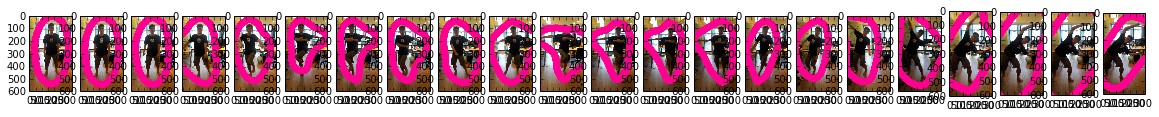

In [2]:
imgNums = list(range(1,23))
file_id = 'wani' # wani20.jpg
SubdirName = 'wani'

# load caffe model
start_time = time.time()

param, model = config_reader()

if param['use_gpu']: 
    caffe.set_mode_gpu()
    caffe.set_device(param['GPUdeviceNumber']) # set to your device!
else:
    caffe.set_mode_cpu()
net = caffe.Net(model['deployFile'], model['caffemodel'], caffe.TEST)
build_NN_from_caffe_t = (time.time() - start_time)    

print("--- %s seconds for build_NN_from_caffe_t ---" % build_NN_from_caffe_t)

# first figure shows padded images
f, axarr = plt.subplots(1, len(imgNums))
f.set_size_inches((20, 20))

for i,imgNum in enumerate(imgNums):
    print('process %dth image'%imgNum)
    test_image = '../../Demo_Nature_Cut_out/'+SubdirName+'/'+file_id+str(imgNum)+'.jpg'
    oriImg = cv.imread(test_image)

    ## construct Contour
    img_return,points,points_draw = Construct_Contour(oriImg, param, model, net)
    axarr[i].imshow(img_return[:,:,[2,1,0]])
#     plt.figure()
#     plt.imshow(img_return[:,:,[2,1,0]])

    ## rm bg, turn it into transparency one
    img_poly = Image.open(test_image)
    wid_poly, hei_poly = img_poly.size
    outputimg = TransparentBg(img_poly,points)

    #set hew heght and width in case the output is too large
    newHei = 600.0
    ratio = newHei/hei_poly
    newWid = int(wid_poly*ratio)
    newHei = int(newHei)
    ptS = int(hei_poly/100)
    
    cv.drawContours(outputimg, np.asarray(points_draw), -1, (255, 0, 145, 1000), ptS*10)
    outputimg = cv.resize(outputimg,(newWid, newHei), interpolation = cv.INTER_CUBIC)

#     plt.imshow(outputimg)

    ##save img
    outdir = './rm_bg_output/'
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    cv.imwrite( outdir+file_id+str(imgNum)+"_rm_bg.png",outputimg[:,:,[2,1,0,3]]);
    
print "--- Finish All Process ---"